# BISI Group 3 Capstone Project CRA - PM Cost Variance and Deliverable Prediction EDA v2.0

In [78]:
# Importing necessary libraries for EDA

import pandas as pd
import numpy as np

import seaborn  as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [79]:
# Importing Dataset
df = pd.read_excel("OPS-PM Baseline Cost (Synthetic).xlsx")

In [80]:
# Viewing Dataset
df.head(10)

,Order Number,Change Request Title,Work Classification,Priority,Application Name,IT Directorate,IT Division,IT Section,Manager ID,Effort Cost,Capacity to Deliver,Actuals
0,161454,Sub-Project-1,Development,Low,Application A,DIR-1,Div-1,Sec-1,485317370,149149.421875,Yes,470545.583046
1,161454,Sub-Project-1,Development,Low,Application B,DIR-2,Div-2,Sec-2,485317562,35203.480469,Yes,8830.170000
2,161454,Sub-Project-1,Development,Low,Application C,DIR-1,Div-3,Sec-3,486437960,30286.000000,Yes,69890.006667
3,161454,Sub-Project-1,Development,Low,Application D,DIR-3,Div-4,Sec-4,484909766,34726.000000,Yes,13018.633333
4,161454,Sub-Project-1,Development,Low,Application E,DIR-4,Div-5,Sec-5,485093174,0.000000,No,0.000000
5,161454,Sub-Project-1,Development,Low,Application A,DIR-1,Div-1,Sec-6,485317372,30544.000000,Yes,14789.150594
6,161454,Sub-Project-1,Development,Low,Application F,DIR-1,Div-6,Sec-7,484878760,39062.379883,Yes,51832.860000
7,161454,Sub-Project-1,Development,Low,Application G,DIR-1,Div-6,Sec-8,484666160,94317.500000,Yes,150693.837598
8,161454,Sub-Project-1,Development,Low,Application H,DIR-1,Div-1,Sec-9,484878160,49126.000000,Yes,74047.011038
9,161454,Sub-Project-1,Development,Low,Application I,DIR-1,Div-3,Sec-10,486438760,35262.000000,Yes,67243.407395


In [81]:
# Datatypes
df.dtypes

Order Number              int64
Change Request Title     object
Work Classification      object
Priority                 object
Application Name         object
IT Directorate           object
IT Division              object
IT Section               object
Manager ID                int64
Effort Cost             float64
Capacity to Deliver      object
Actuals                 float64
dtype: object

In [82]:
# Stats about the dataset
print("Dataset Shape: ", df.shape)


print("Dataset Stats : ")
df.describe()

Dataset Shape:  (64, 12)
Dataset Stats : 


,Order Number,Manager ID,Effort Cost,Actuals
count,64.000000,6.400000e+01,64.000000,64.000000
mean,158681.765625,4.852910e+08,51483.008179,74219.899063
std,6613.652596,5.216743e+05,103159.499199,128705.567171
min,140106.000000,4.840616e+08,0.000000,0.000000
25%,161097.000000,4.850473e+08,29769.750000,13018.633333
50%,161214.000000,4.852886e+08,34571.000000,35223.260000
75%,161385.000000,4.853176e+08,39242.635010,70243.376006
max,161454.000000,4.864408e+08,815982.000000,634237.546746


In [83]:
# Check for missing values
df.isnull().sum()

Order Number            0
Change Request Title    0
Work Classification     0
Priority                0
Application Name        0
IT Directorate          0
IT Division             0
IT Section              0
Manager ID              0
Effort Cost             0
Capacity to Deliver     0
Actuals                 0
dtype: int64

## Remapping and calculating new columns

In [84]:
# Re-mapping Priority to numerical, Mapping Critical - 4, High - 3, Medium - 2, Low - 1
priority_mapping = {'Low': 1,'Medium': 2,'High': 3,'Critical': 4}
df['Priority'] = df['Priority'].map(priority_mapping)

# Re-mapping Work Classification to numerical, Development - 1, Enhancement - 2
work_classification_mapping = {'Development': 1,'Enhancement': 2}
df['Work Classification'] = df['Work Classification'].map(work_classification_mapping)

# Re-mapping Deliver to numerical, Yes - 1, No - 0
deliver_mapping = {'Yes': 1, 'No': 0}
df['Capacity to Deliver'] = df['Capacity to Deliver'].map(deliver_mapping)

# Adding a new column "Cost Variance"
df['Cost Variance'] = df['Effort Cost'] - df['Actuals']

# Adding a new column "Cost Variance Percentage"
df['Cost Variance Percentage'] = (df['Cost Variance'] / df['Effort Cost']) * 100
df.fillna(0, inplace=True)


# Display the first few rows of the dataset to confirm the addition
df.head(10)

,Order Number,Change Request Title,Work Classification,Priority,Application Name,IT Directorate,IT Division,IT Section,Manager ID,Effort Cost,Capacity to Deliver,Actuals,Cost Variance,Cost Variance Percentage
0,161454,Sub-Project-1,1,1,Application A,DIR-1,Div-1,Sec-1,485317370,149149.421875,1,470545.583046,-321396.161171,-215.486025
1,161454,Sub-Project-1,1,1,Application B,DIR-2,Div-2,Sec-2,485317562,35203.480469,1,8830.170000,26373.310469,74.916770
2,161454,Sub-Project-1,1,1,Application C,DIR-1,Div-3,Sec-3,486437960,30286.000000,1,69890.006667,-39604.006667,-130.766713
3,161454,Sub-Project-1,1,1,Application D,DIR-3,Div-4,Sec-4,484909766,34726.000000,1,13018.633333,21707.366667,62.510415
4,161454,Sub-Project-1,1,1,Application E,DIR-4,Div-5,Sec-5,485093174,0.000000,0,0.000000,0.000000,0.000000
5,161454,Sub-Project-1,1,1,Application A,DIR-1,Div-1,Sec-6,485317372,30544.000000,1,14789.150594,15754.849406,51.580832
6,161454,Sub-Project-1,1,1,Application F,DIR-1,Div-6,Sec-7,484878760,39062.379883,1,51832.860000,-12770.480117,-32.692530
7,161454,Sub-Project-1,1,1,Application G,DIR-1,Div-6,Sec-8,484666160,94317.500000,1,150693.837598,-56376.337598,-59.772935
8,161454,Sub-Project-1,1,1,Application H,DIR-1,Div-1,Sec-9,484878160,49126.000000,1,74047.011038,-24921.011038,-50.728761
9,161454,Sub-Project-1,1,1,Application I,DIR-1,Div-3,Sec-10,486438760,35262.000000,1,67243.407395,-31981.407395,-90.696521


## Correlation Matrix

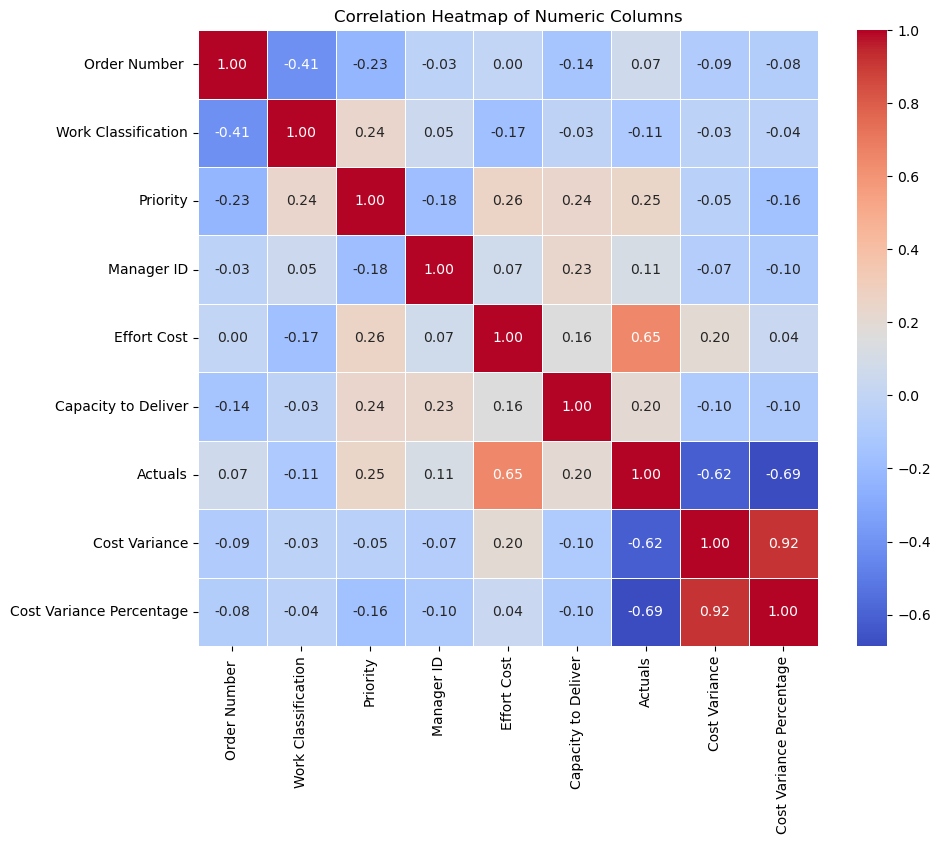

In [85]:
# Calculate correlation matrix
num_corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(num_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

## Distribution Visuals

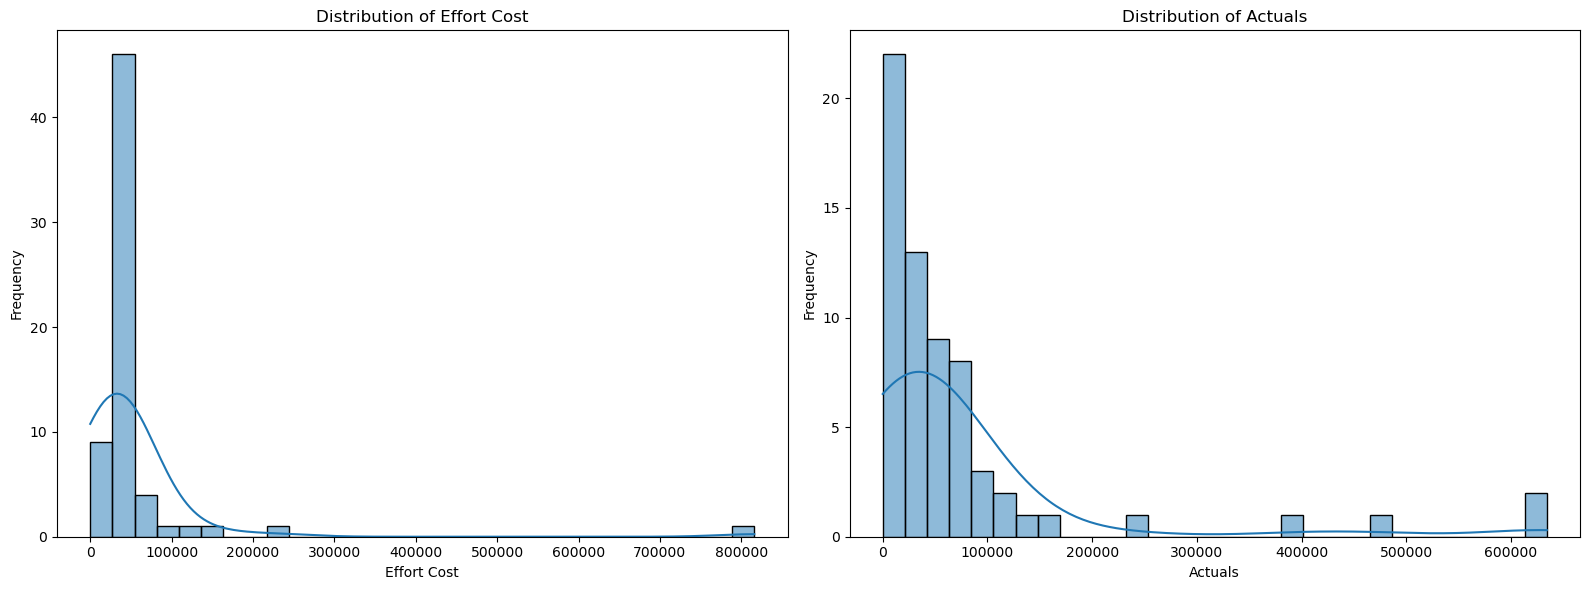

In [86]:
# Examining distributions of "Effort Cost" and "Actuals"
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['Effort Cost'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Effort Cost')
ax[0].set_xlabel('Effort Cost')
ax[0].set_ylabel('Frequency')

sns.histplot(df['Actuals'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Actuals')
ax[1].set_xlabel('Actuals')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

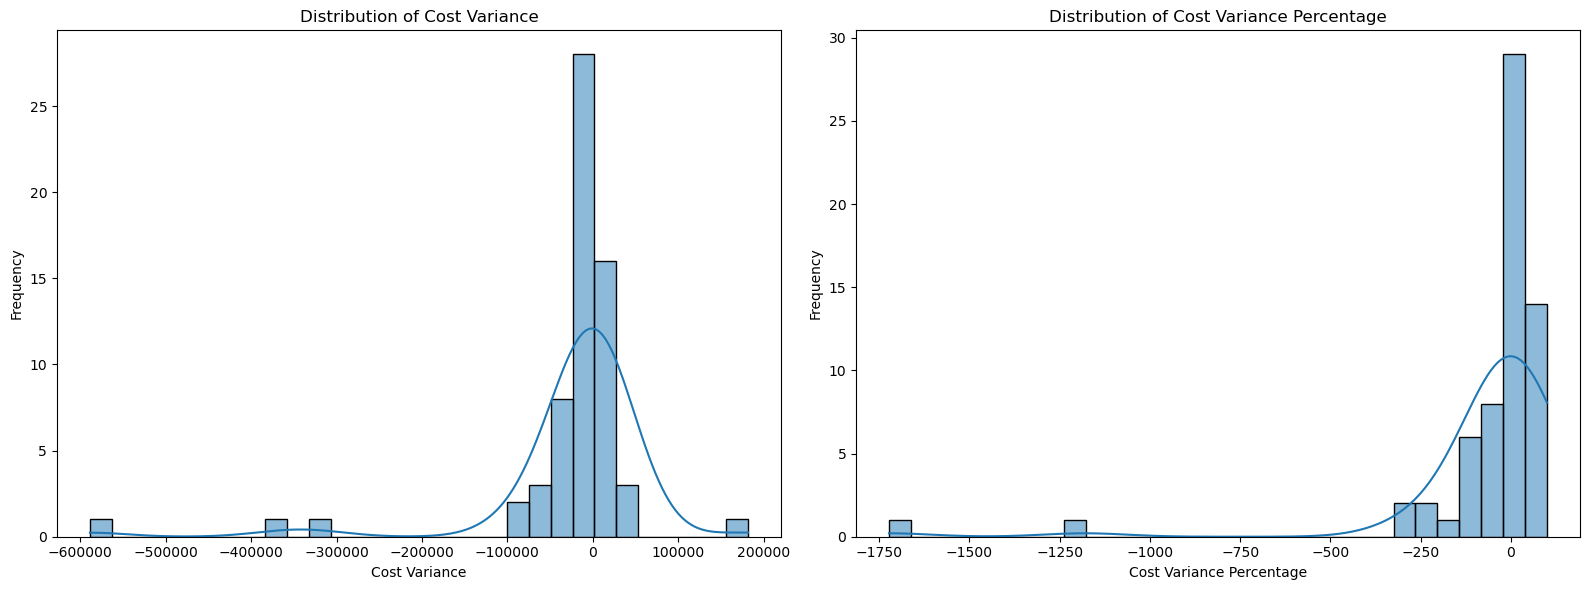

In [88]:
# Examining distributions of "Cost Variance" and "Cost Variance Percentage"
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['Cost Variance'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Cost Variance')
ax[0].set_xlabel('Cost Variance')
ax[0].set_ylabel('Frequency')

sns.histplot(df['Cost Variance Percentage'].dropna(), bins=30, kde=True, ax=ax[1])  # Dropping NaN values for plotting
ax[1].set_title('Distribution of Cost Variance Percentage')
ax[1].set_xlabel('Cost Variance Percentage')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

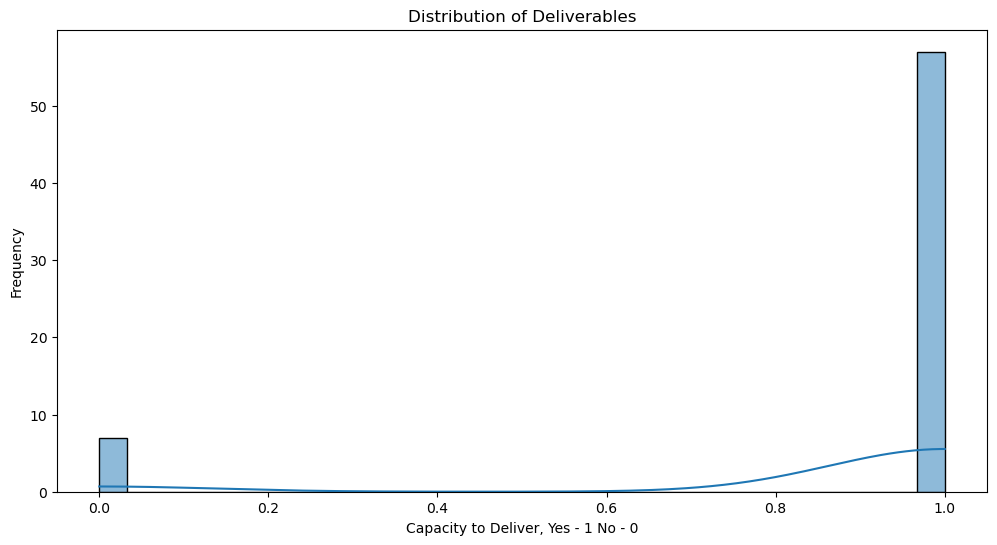

In [92]:
# Plotting the distribution of "Capacity to Deliver"
plt.figure(figsize=(12, 6))
sns.histplot(df['Capacity to Deliver'], kde=True, bins=30)
plt.title('Distribution of Deliverables')
plt.xlabel('Capacity to Deliver, Yes - 1 No - 0')
plt.ylabel('Frequency')
plt.show()

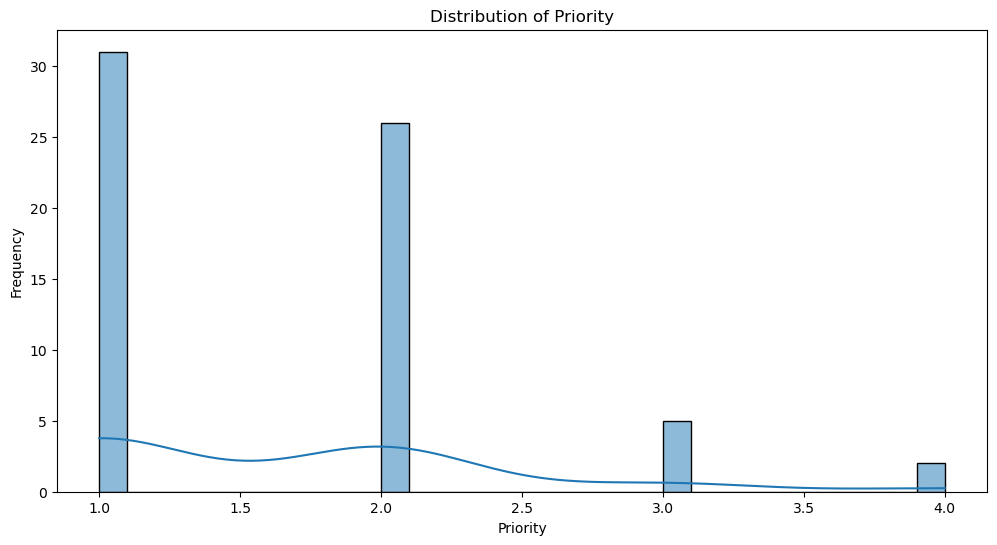

In [93]:
# Plotting the distribution of "Priority"
plt.figure(figsize=(12, 6))
sns.histplot(df['Priority'], kde=True, bins=30)
plt.title('Distribution of Priority')
plt.xlabel('Priority')
plt.ylabel('Frequency')
plt.show()

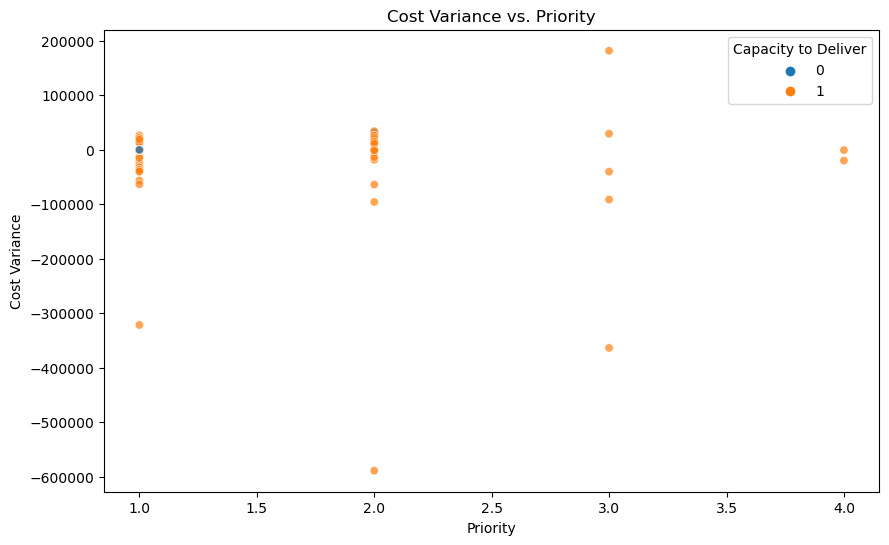

In [89]:
# Scatter plot for Cost Variance vs. Priority
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Priority', y='Cost Variance', data=df, hue='Capacity to Deliver', sizes=(50, 200), alpha=0.7)
plt.title('Cost Variance vs. Priority')
plt.xlabel('Priority')
plt.ylabel('Cost Variance')
plt.show()

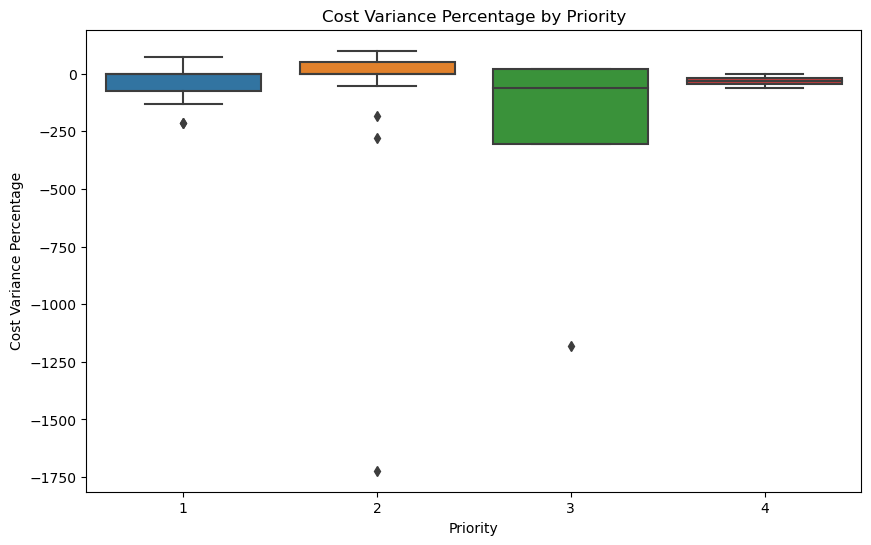

In [91]:
# Box plot for Cost Variance Percentage by Priority
plt.figure(figsize=(10, 6))
sns.boxplot(x='Priority', y='Cost Variance Percentage', data=df)
plt.title('Cost Variance Percentage by Priority')
plt.xlabel('Priority')
plt.ylabel('Cost Variance Percentage')
plt.show()

In [95]:
# Exporting the modified dataframe to excel ( test purposes )
df.to_excel("edaOutput.xlsx", index=False)